# Lab 01 - Train Your First CNN

In [0]:
#Release: 1.1907.1601

### Import Module

In [1]:
import tensorflow as tf
import keras
import numpy as np

print("TensorFlow version: " + tf.__version__)

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image
from matplotlib import pyplot
#from scipy.misc import toimage

%matplotlib inline

###  - Function to Show Image -

In [0]:
#helper function
def show_image(img, label="", zoom=False):
    #labelname[y_train[0,0].astype(int)]
    if not zoom:
        #pyplot.figure(figsize=(4,3))
        pyplot.subplot(330 + 1 + i)
    else:
        pyplot.figure(figsize=(6,3))
        pyplot.subplot(1,2,1)
        pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    #pyplot.imshow(img, cmap=pyplot.cm.binary)
    pyplot.xlabel('{code} - {label}'.format(code=label, label=labelname[label]))
    pyplot.imshow(img, cmap=pyplot.cm.binary)

### - Function to plot model accuracy and loss -

In [0]:
def plot_model_history(model_history):
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    

### - Function Show Image Prediction -

In [0]:
#helper function
def show_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  
  pyplot.imshow(img, cmap=pyplot.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
    color = 'blue'
   
  else:
    color = 'red'
  
  pyplot.xlabel("{} {:2.0f}% ({})".format(labelname[predicted_label],
                                100*np.max(predictions_array),
                                labelname[true_label[0]]),
                                color=color)

def show_value_prediction(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  thisplot = pyplot.bar(range(10), predictions_array, color="#777777")
  pyplot.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
   
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

#### Step 01 - Load Cifar10 Data

In [4]:
num_classes = 10
labelname = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# load data
(img_train, label_train), (img_test, label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


#### Step 02 - Data Exploration

In [5]:
# view data shape
print('img_train shape: ', img_train.shape)
print('Number of image: ', img_train.shape[0])

print('label_train shape:', label_train.shape)

img_train shape:  (50000, 32, 32, 3)
Number of image:  50000
label_train shape: (50000, 1)


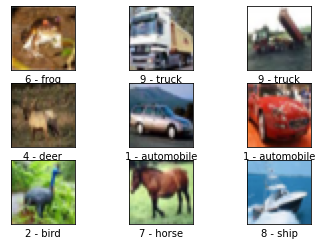

In [6]:
# view sample data
for i in range(0, 9):
    show_image(Image.fromarray(img_train[i]), label_train[i,0])

In [7]:
img_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
img_train[0].shape

(32, 32, 3)

In [9]:
img_train[0][0].shape

(32, 3)

In [10]:
img_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [11]:
label_train[0]

array([6], dtype=uint8)

#### Step 03 - Training Data Preparation

In [12]:
# The data, split between train and test sets:
# (img_train, label_train), (img_test, label_test) = cifar10.load_data()
print('img_train shape:', img_train.shape)
print('label_train shape:', label_train.shape)
print('Training data: {num} samples'.format(num = img_train.shape[0]))
print('Test data: {num} samples'.format(num = img_test.shape[0]))

img_train shape: (50000, 32, 32, 3)
label_train shape: (50000, 1)
Training data: 50000 samples
Test data: 10000 samples


In [13]:
#integer to float
img_train_f = img_train.astype('float32')
img_test_f = img_test.astype('float32')
img_train_f /= 255
img_test_f /= 255
print('x_train shape:', img_train_f.shape)
print(img_train_f.shape[0], 'train samples')
print(img_test_f.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [14]:
# Convert label vectors to one hot encoding.
label_train_one_hot = keras.utils.to_categorical(label_train, num_classes)
label_test_one_hot = keras.utils.to_categorical(label_test, num_classes)
print('label_train shape:', label_train_one_hot.shape)
print('Original label:', label_train[0])
print('After conversion to one-hot:', label_train_one_hot[0])

label_train shape: (50000, 10)
Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Step 04 - Create Model

In [15]:
#Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=img_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_2 (Activation)    (None, 10)               

#### Step 05 - Train Model

In [0]:
#Training Hyperparatemer
learning_rate = 0.0001
decay = 1e-6


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=learning_rate, decay=decay)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
import os
import datetime
import time

batch_size = 100
epochs = 30

start = time.time()
history = model.fit(img_train_f, label_train_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(img_test_f, label_test_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'labs01_model_{batch}.h5'.format(batch=now.strftime("%Y%m%d_%H%M"))

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

end = time.time()
print("Model took {:2.0f} seconds to train".format((end - start)))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 38s 761us/step - loss: 2.0020 - accuracy: 0.2957 - val_loss: 1.8201 - val_accuracy: 0.3838
Epoch 2/30
50000/50000 [==============================] - 38s 763us/step - loss: 1.7751 - accuracy: 0.3861 - val_loss: 1.7028 - val_accuracy: 0.4176
Epoch 3/30
50000/50000 [==============================] - 38s 762us/step - loss: 1.6760 - accuracy: 0.4223 - val_loss: 1.6225 - val_accuracy: 0.4428
Epoch 4/30
50000/50000 [==============================] - 38s 761us/step - loss: 1.6074 - accuracy: 0.4464 - val_loss: 1.5670 - val_accuracy: 0.4589
Epoch 5/30
50000/50000 [==============================] - 38s 761us/step - loss: 1.5513 - accuracy: 0.4658 - val_loss: 1.5173 - val_accuracy: 0.4841
Epoch 6/30
50000/50000 [==============================] - 38s 764us/step - loss: 1.5096 - accuracy: 0.4797 - val_loss: 1.4840 - val_accuracy: 0.4921
Epoch 7/30
50000/50000 [==============================] 

In [0]:
for key in history.history.keys():
    print(key)

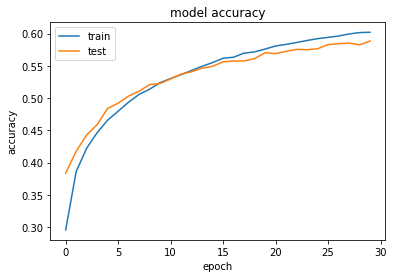

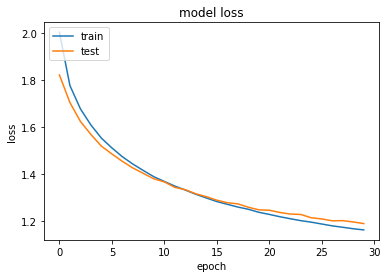

In [23]:
#show graph
plot_model_history(history)

#### Step 06 - Evaluate Model

In [24]:
test_loss, test_acc = model.evaluate(img_test_f, label_test_one_hot)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 257us/step
Test accuracy: 0.5885000228881836


In [0]:
predictions = model.predict(img_test_f)

array([8.4644910e-03, 4.4465490e-04, 2.9751908e-02, 6.2658781e-01,
       1.1478676e-02, 1.9232106e-01, 1.1942294e-01, 6.2378938e-04,
       1.0571547e-02, 3.3309529e-04], dtype=float32)

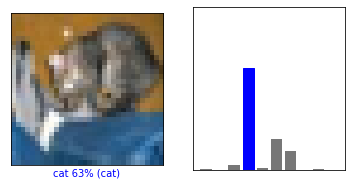

In [26]:
#labelname = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
i = 0
pyplot.figure(figsize=(6,3))
pyplot.subplot(1,2,1)
show_image_prediction(i, predictions, label_test, img_test)
pyplot.subplot(1,2,2)
show_value_prediction(i, predictions,  label_test)
predictions[i]

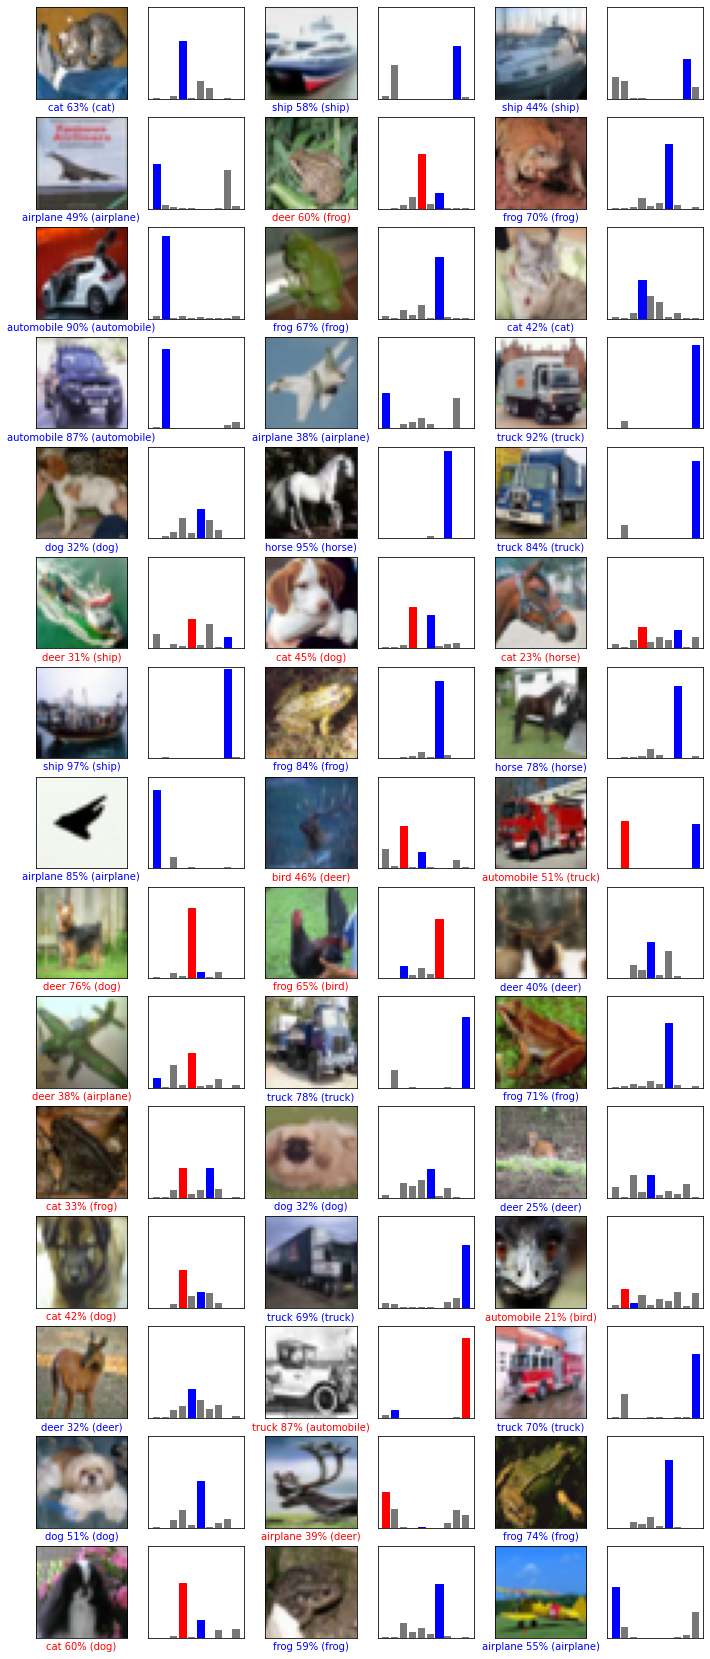

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  pyplot.subplot(num_rows, 2*num_cols, 2*i+1)
  show_image_prediction(i, predictions, label_test, img_test)
  pyplot.subplot(num_rows, 2*num_cols, 2*i+2)
  show_value_prediction(i, predictions, label_test)

# What Next?

#### Retraining with different optimization

In [0]:
learning_rate = 0.01
decay = 1e-6

In [0]:
# Stochastic gradient descent optimizer
#opt = keras.optimizers.SGD(lr=learning_rate, decay=decay, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error',
#              optimizer=opt,
#              metrics=['accuracy'])

In [0]:
# Adam optimizer
#opt = keras.optimizers.Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(loss='categorical_crossentropy',
#              optimizer=opt,
#              metrics=['accuracy'])

#### Data Augmentation

In [0]:
#Data Augmentation Function
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [0]:
#Fit the augmentation method to the data

train_generator.fit(train_img)
test_generator.fit(test_img)

#### Create more complex model

In [0]:
#Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=img_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))

##add more convolution layer..

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()